# More Matplotlib Functionality

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import yfinance as yf

### Figures and Axes
* mpl object are these two objects
* this means you can create and access each 
* in general you must have a figure and then you can add axes (subplots)

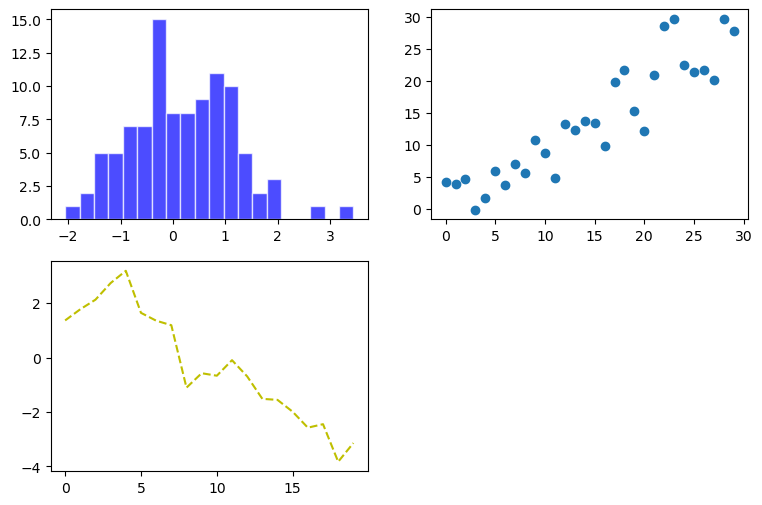

In [9]:
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot(np.random.randn(20).cumsum(), 'y--')
ax1.hist(np.random.randn(100), bins=20, edgecolor='w', color='b', alpha=.7);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30));

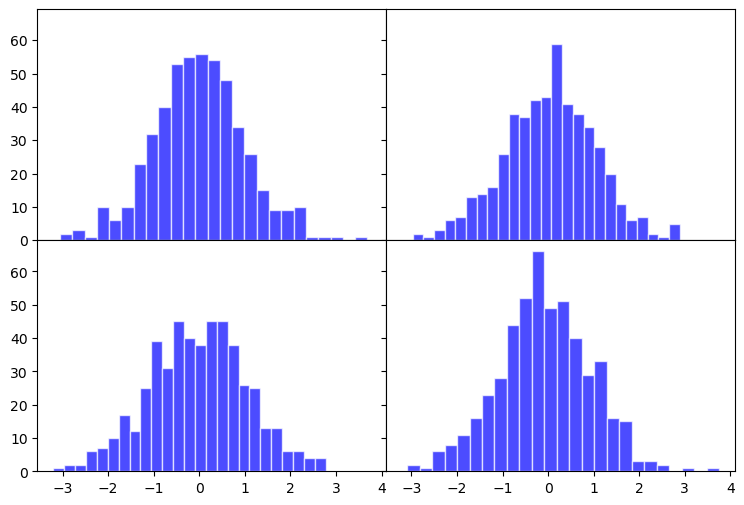

In [19]:
fig, axes = plt.subplots(2,2, sharey=True, sharex=True, figsize=(9,6))
for row in range(2):
    for column in range(2):
        axes[row,column].hist(np.random.randn(500), bins=25, 
                              color='b', alpha=.7, edgecolor='w')
plt.subplots_adjust(wspace=0, hspace=0)

# Themes
* https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [ ]:
plt.style.use('bmh')

In [ ]:
!jt -t onedork -nfs 12 - f

# Line Graphs

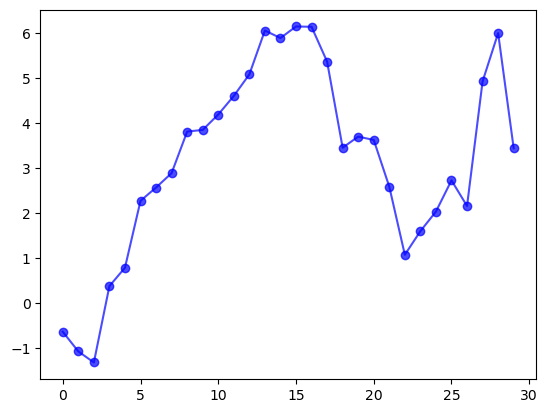

In [20]:
plt.plot(np.random.randn(30).cumsum(), 'bo-', alpha=.7)

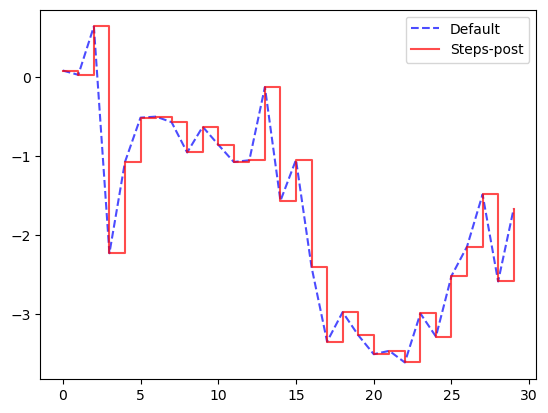

In [27]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'b--', alpha=.7, label='Default')
plt.plot(data, 'r', alpha=.7, drawstyle='steps-post', label='Steps-post')
plt.legend(loc='best');


Text(0, 0.5, 'Level')

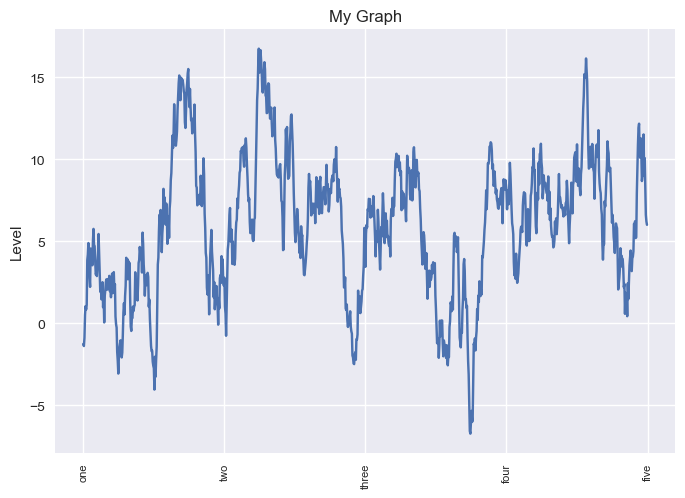

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], fontsize=8, rotation=90)
ax.plot(np.random.randn(1000).cumsum())
plt.title('My Graph');
ax.set_ylabel('Level')

In [39]:
data = yf.download('^GSPC', start='2007-01-01', end='2011-01-01')['Close']

[*********************100%%**********************]  1 of 1 completed


(600.0, 1800.0)

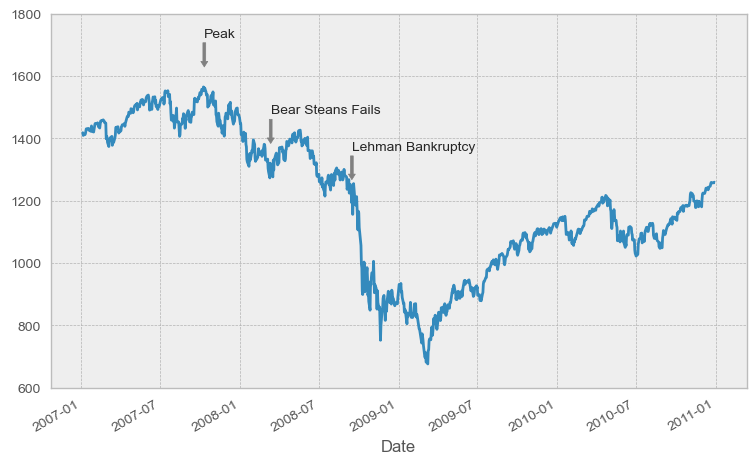

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data.plot()
crisis =[(datetime(2007,10,11),'Peak'),
         (datetime(2008,3,12), 'Bear Steans Fails'),
         (datetime(2008,9,15), 'Lehman Bankruptcy')]
for date, label in crisis:
    ax.annotate(label, xy=(date, data.asof(date) + 75),
                xytext=(date, data.asof(date) + 200), 
                arrowprops=dict(color='grey', headwidth=5, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')
ax.set_ylim([600, 1800])    

# Scatter Plots
* Colormaps: https://matplotlib.org/stable/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py

In [65]:
data = yf.download(['AAPL', 'NVDA'], '2023-03-01')['Close']
returns = np.log(data).diff()
returns.dropna(inplace=True)
returns.head()

[*********************100%%**********************]  2 of 2 completed


,AAPL,NVDA
Date,,
2023-03-02,0.004121,0.026777
2023-03-03,0.034488,0.024406
2023-03-06,0.018370,-0.014164
2023-03-07,-0.014603,-0.011357
2023-03-08,0.008342,0.037629


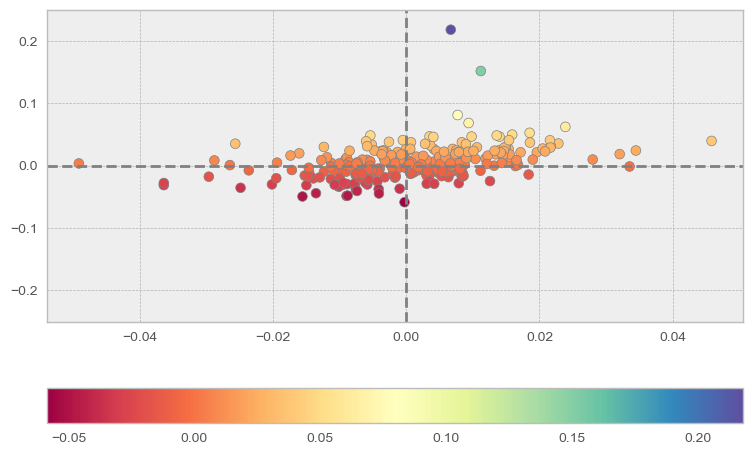

In [78]:
plt.scatter(returns.AAPL, returns.NVDA, c=returns.NVDA, 
            cmap='Spectral', edgecolor='grey')
plt.colorbar(orientation='horizontal')
plt.axhline(0, c='grey', ls='--')
plt.axvline(0, c='grey', ls='--')
plt.ylim(-.25, .25);

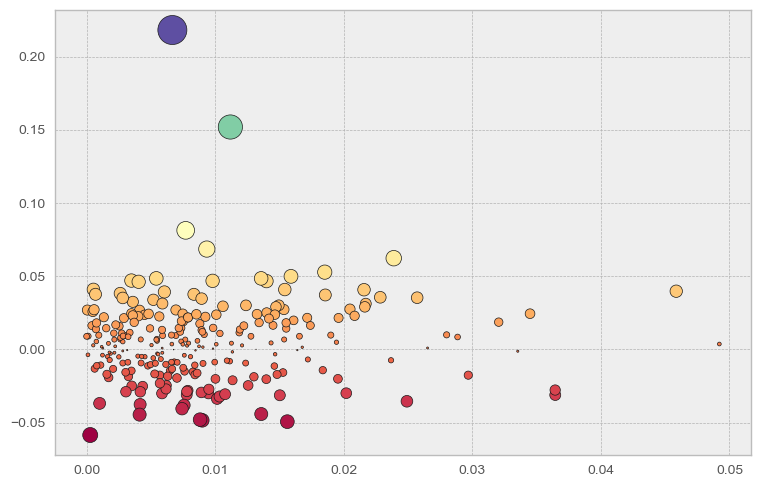

In [83]:
size = np.abs(returns.NVDA) * 2000
plt.scatter(np.abs(returns.AAPL), returns.NVDA, c=returns.NVDA, 
            cmap='Spectral', s=size, edgecolor=(.1,.1,.1))

# Histograms & Bar Graphs

In [91]:
x = np.random.standard_normal(10000)
y = np.random.normal(1,1,10000)

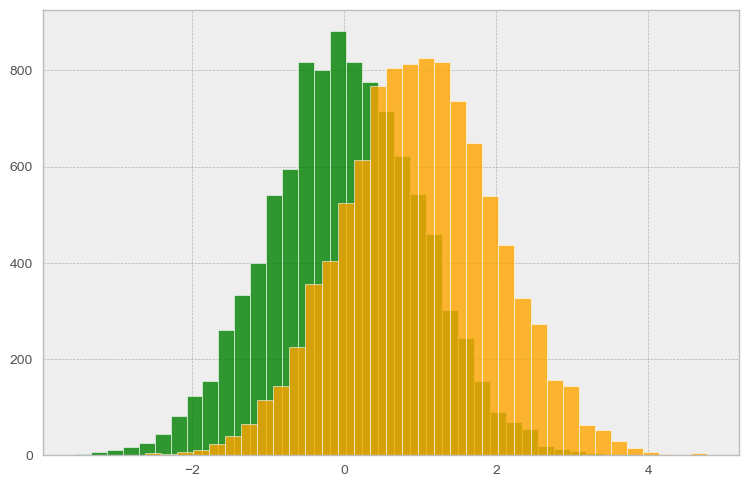

In [92]:
plt.hist(x, bins=35, color='g', edgecolor='w', alpha=.8)
plt.hist(y, bins=35, color='orange', edgecolor='w', alpha=.8);

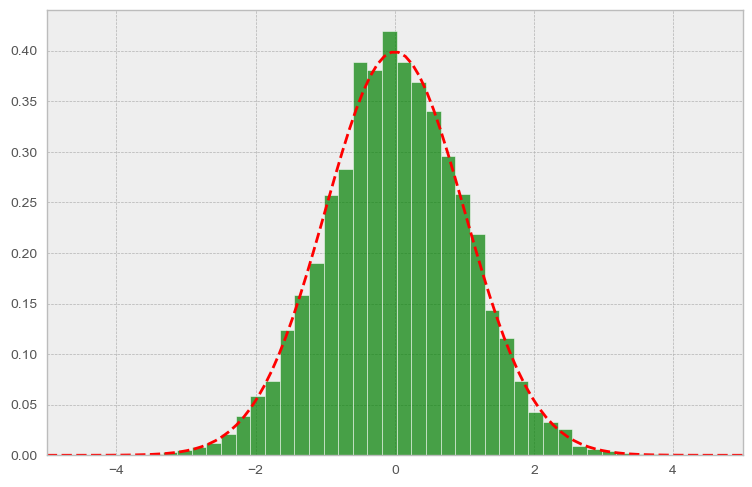

In [98]:
plt.xlim(-5,5)
plt.hist(x, bins=35, density=True, edgecolor='w', color='g', alpha=.7)
overlay = np.linspace(-5,5, 100)
mean, std = 0, 1
pdf = norm.pdf(overlay, mean, std)
plt.plot(overlay, pdf, 'r--');

In [100]:
groups = {"under 5": 6.8, "5 to 17": 18.9, "18 to 24": 9.6,
          "25 to 44": 30.2, "45 to 64": 22.1, "over 65": 12.4}

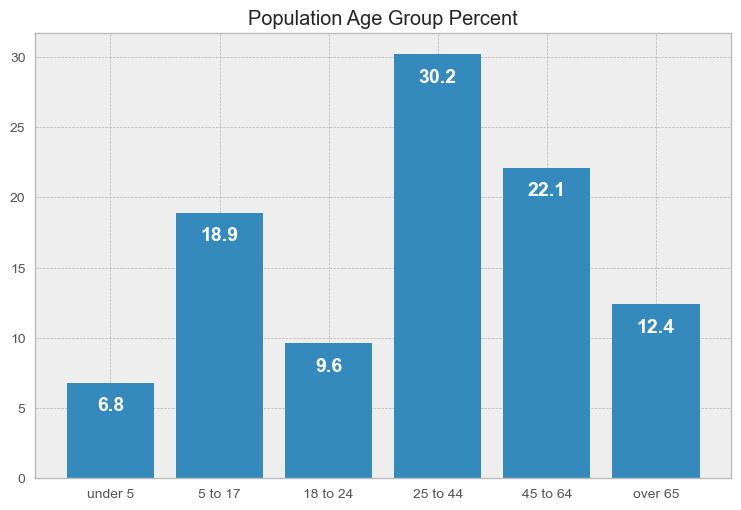

In [123]:
plt.title("Population Age Group Percent")
plt.bar(groups.keys(), groups.values())
for k,v in groups.items():
    plt.text(k,v - 2, str(v), fontsize=14, 
             fontweight='bold', horizontalalignment='center', color='w' )
    


<BarContainer object of 6 artists>

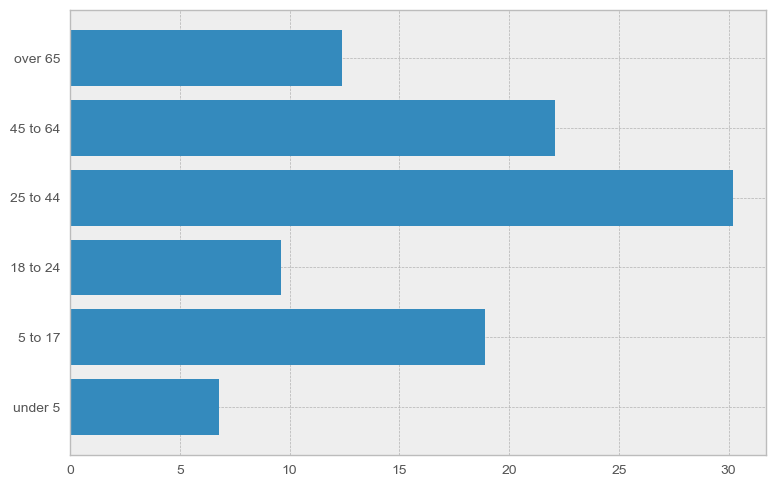

In [122]:
plt.barh(list(groups.keys()),list(groups.values()))

### Plot in value sorted order

In [128]:
from operator import itemgetter

In [129]:
groups_sorted = sorted(groups.items(), key=itemgetter(1), reverse=True)

In [130]:
groups_sorted

[('25 to 44', 30.2),
 ('45 to 64', 22.1),
 ('5 to 17', 18.9),
 ('over 65', 12.4),
 ('18 to 24', 9.6),
 ('under 5', 6.8)]

In [144]:
x = [item[0] for item in groups_sorted]
y = [item[1] for item in groups_sorted]

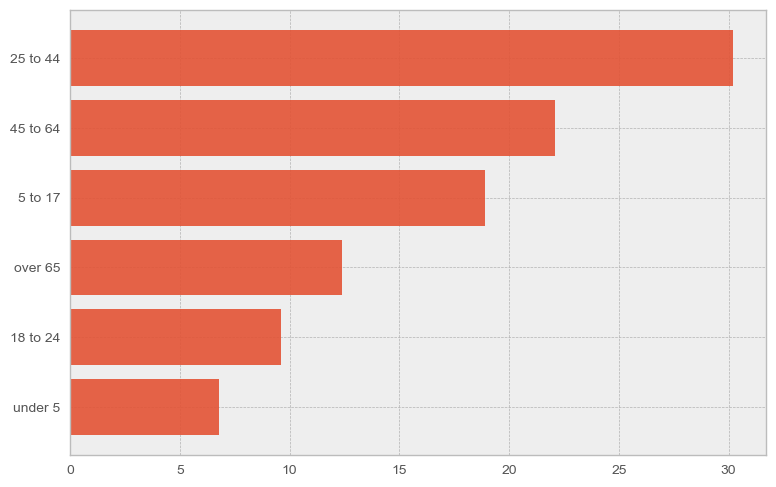

In [161]:
plt.barh(x,y, color='#E35335', alpha=.9)
plt.gca().invert_yaxis()